# Clustering
- [x] Beispiel  k-Means
- [x] Beispiel  Hierarchical Clustering
- [x] Beispiel  DBSCAN
- [ ] Beispiel  Fuzzy Clustering
- [ ] Beispiel  Self-Organizing Map
- Quelle: 
    - https://github.com/ipython-books/cookbook-2nd-code/blob/master/chapter08_ml/08_clustering.ipynb
    - https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html#:~:text=The%20k%2Dmeans%20algorithm%20searches,points%20belonging%20to%20the%20cluster.

# Unsupervised Learning


## Clustering 

### Beispiele: 



In [1]:
#k-Means 
from itertools import permutations
import numpy as np
import sklearn
import sklearn.decomposition as dec
import sklearn.cluster as clu
import sklearn.datasets as ds
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
X, y = ds.make_blobs(n_samples=200,
                     n_features=2,
                     centers=3,
                     cluster_std=1.5,
                     )

In [6]:
def relabel(cl):
    """Relabel a clustering with three clusters
    to match the original classes."""
    if np.max(cl) != 2:
        return cl
    perms = np.array(list(permutations((0, 1, 2))))
    i = np.argmin([np.sum(np.abs(perm[cl] - y))
                   for perm in perms])
    p = perms[i]
    return p[cl]

In [7]:
def display_clustering(labels, title):
    """Plot the data points with the cluster
    colors."""

    # We relabel the classes when there are 3 clusters
    labels = relabel(labels)
    fig, axes = plt.subplots(1, 2, figsize=(8, 3),
                             sharey=True)
    # Display the points with the true labels on the
    # left, and with the clustering labels on the
    # right.
    for ax, c, title in zip(
            axes,
            [y, labels],
            ["True labels", title]):
        ax.scatter(X[:, 0], X[:, 1], c=c, s=30,
                   linewidths=0, cmap=plt.cm.rainbow)
        ax.set_title(title)

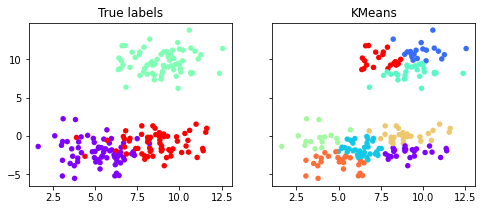

In [8]:
km = clu.KMeans()
km.fit(X)
display_clustering(km.labels_, "KMeans")

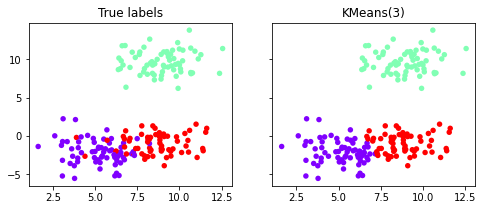

In [9]:
km = clu.KMeans(n_clusters=3)
km.fit(X)
display_clustering(km.labels_, "KMeans(3)")

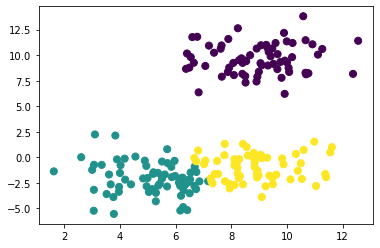

In [19]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 3, rseed=3)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

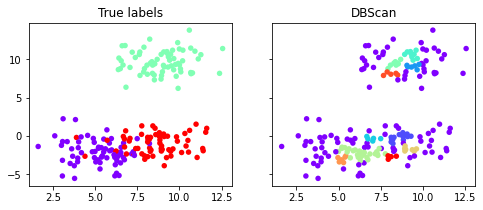

In [18]:
db=clu.DBSCAN()
db.fit(X)
display_clustering(db.labels_, "DBScan")

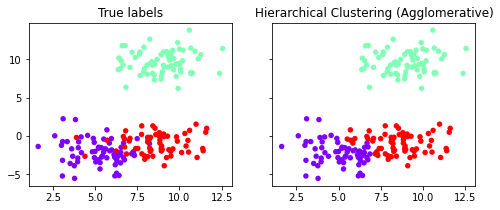

In [13]:
hc=clu.AgglomerativeClustering(3)
hc.fit(X)
display_clustering(hc.labels_, "Hierarchical Clustering (Agglomerative)")

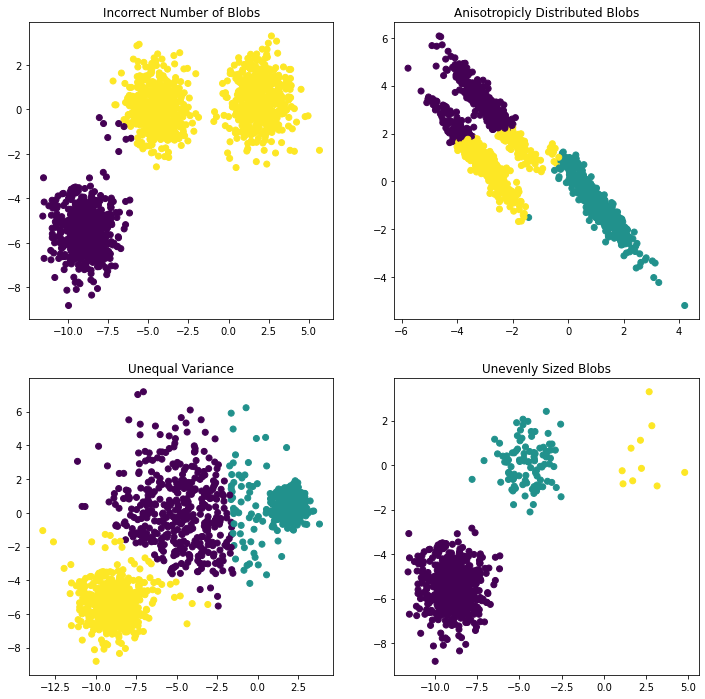

In [20]:
# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()